# 1) Problem statement.

The dataset contains aggregated data regarding each district in California.
In this dataset, we have information regarding the demography (income, population, house occupancy) in the districts, the
location of the districts (latitude, longitude) and general information regarding the house in the districts(number of rooms, 
number of bedrooms, age of the house). 

# 2) Data Collection.

 This dataset can be fetched from internet using scikit-learn.This dataset contains 20640  rows and 9 columns


# Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# import dataset

In [94]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

# Attribute information



        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude


Show top 5 records

In [61]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Summary of the dataset

In [62]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Shape of the Dataset

In [63]:
california_housing.frame.shape

(20640, 9)

show last 5 records

In [64]:
california_housing.frame.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


Check Datatypes in the dataset

In [65]:
california_housing.frame.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [66]:
california_housing.frame.count()

MedInc         20640
HouseAge       20640
AveRooms       20640
AveBedrms      20640
Population     20640
AveOccup       20640
Latitude       20640
Longitude      20640
MedHouseVal    20640
dtype: int64

To see the memory usage of each column in bytes

In [67]:
california_housing.frame.memory_usage()

Index             128
MedInc         165120
HouseAge       165120
AveRooms       165120
AveBedrms      165120
Population     165120
AveOccup       165120
Latitude       165120
Longitude      165120
MedHouseVal    165120
dtype: int64

Show no of unique values for each column

In [68]:
california_housing.frame.nunique()

MedInc         12928
HouseAge          52
AveRooms       19392
AveBedrms      14233
Population      3888
AveOccup       18841
Latitude         862
Longitude        844
MedHouseVal     3842
dtype: int64

Calculate skew for each column which will help us to know the direction of outliers

In [69]:
california_housing.frame.skew()

MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64

To find null values

In [70]:
california_housing.frame.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

# 3.Exploring data

In [76]:
# define numerical & categorical columns
categorical_features = [i for i in california_housing.frame.columns if california_housing.frame[i].dtypes != 'float']
numerical_features = [i for i in california_housing.frame.columns if california_housing.frame[i].dtypes == 'float']
print(categorical_features)
print(numerical_features)

[]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


# Univariate Ansalysis

Numerical Analysis

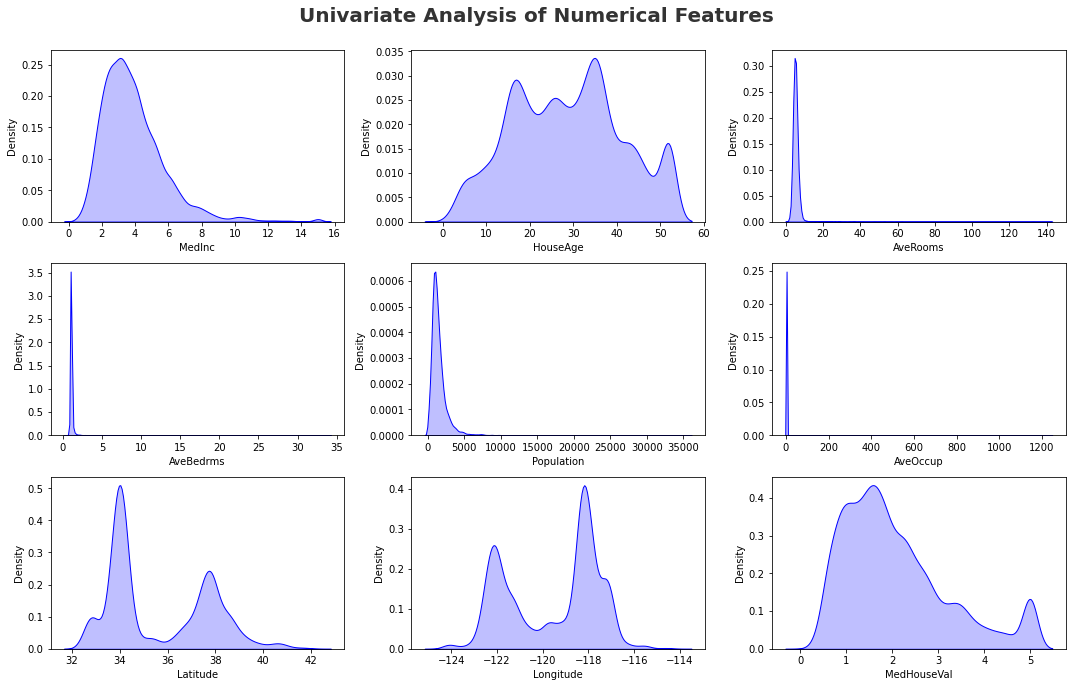

In [96]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=california_housing.frame[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

Observation:
1.MedInc and Population are right skewed.

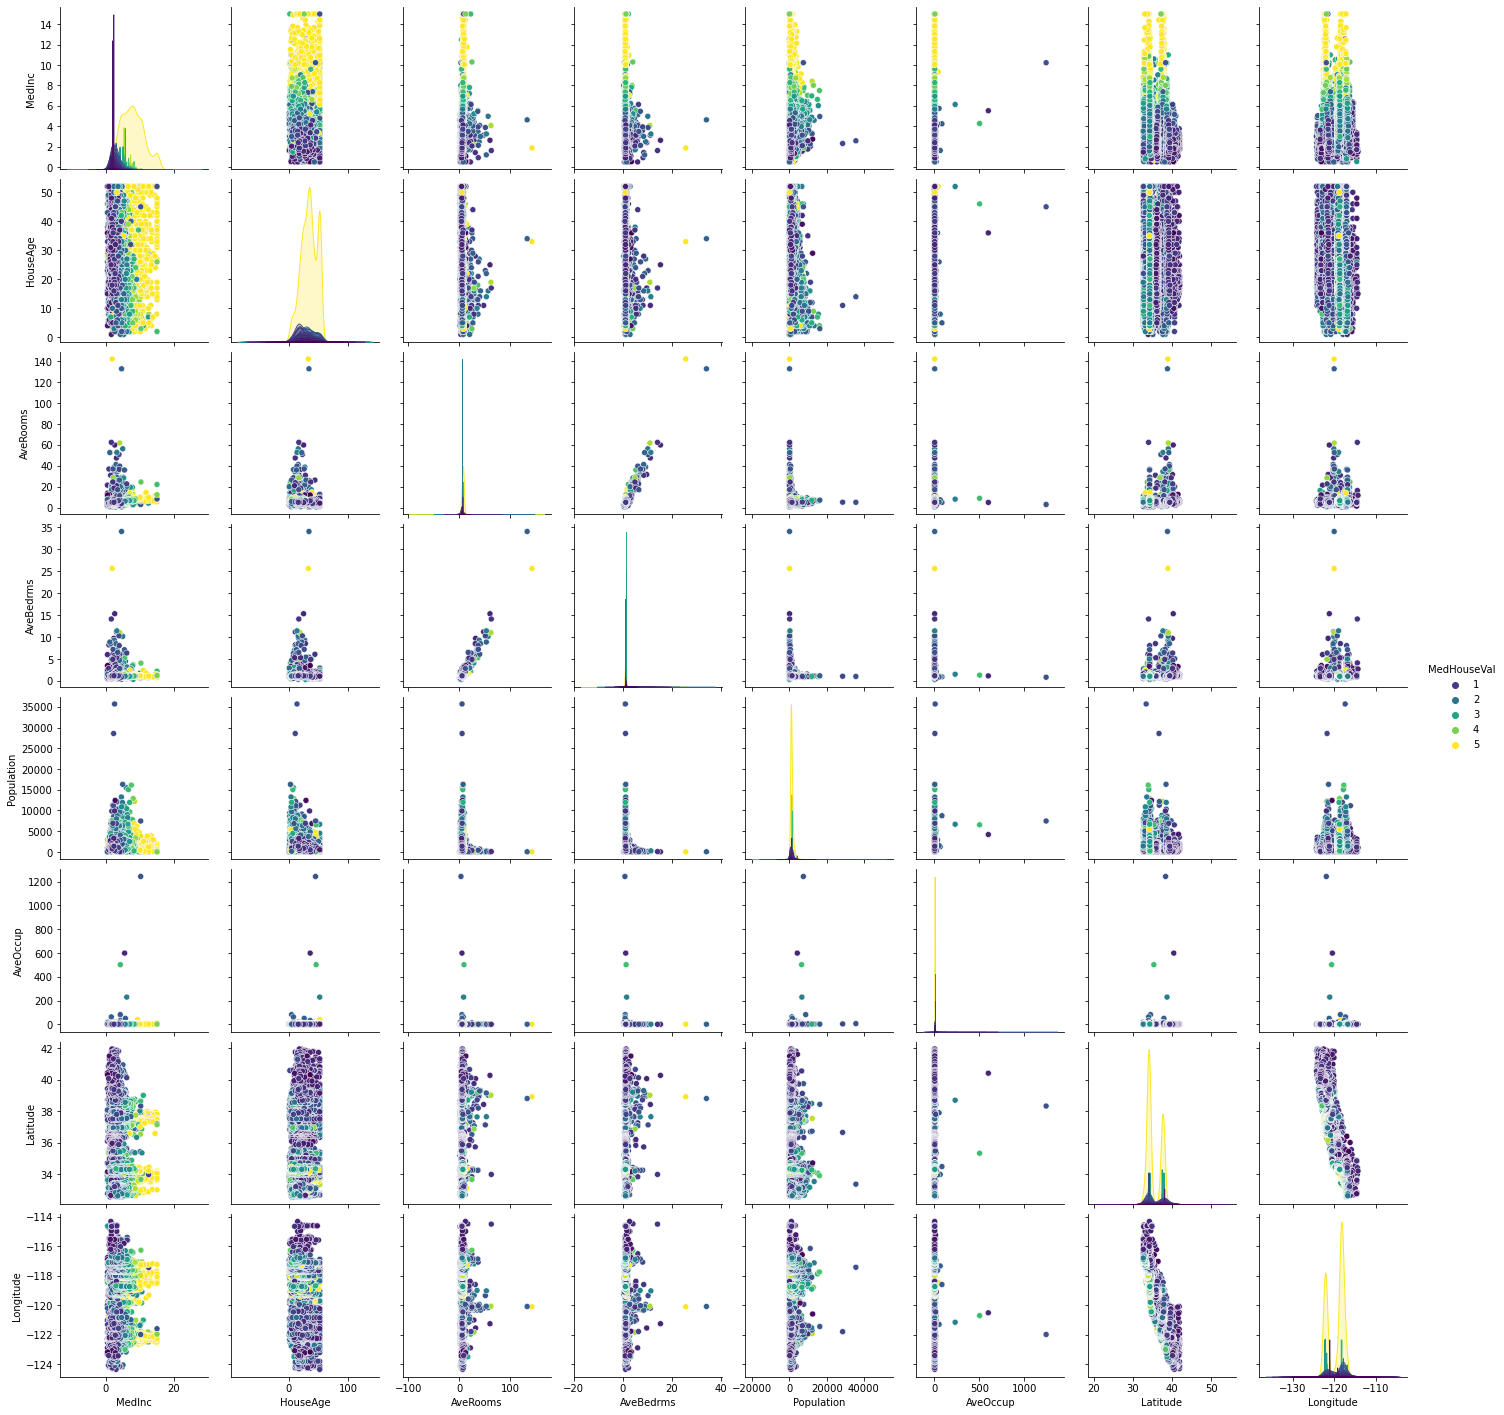

In [75]:
from matplotlib import rcParams
rcParams['figure.figsize']=15,8
sns.pairplot(data=california_housing.frame, hue="MedHouseVal", palette="viridis")

# Bivariate analysis

<AxesSubplot:xlabel='Population', ylabel='MedInc'>

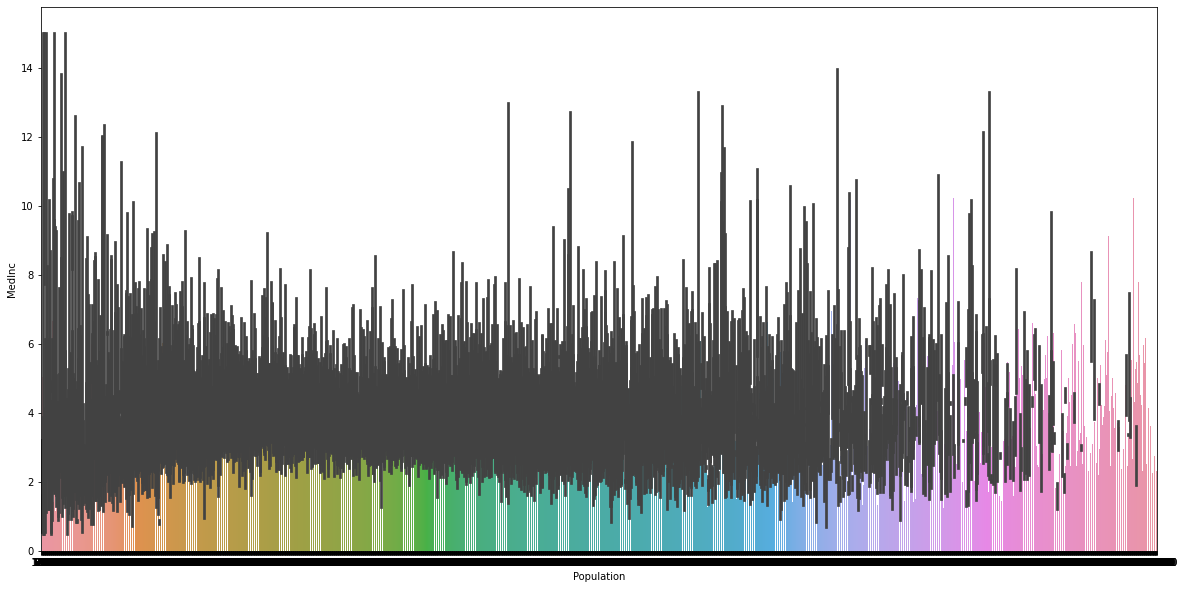

In [120]:

sns.barplot(x='Population',y='MedInc',data=california_housing.frame)

# To detect outliers

<AxesSubplot:>

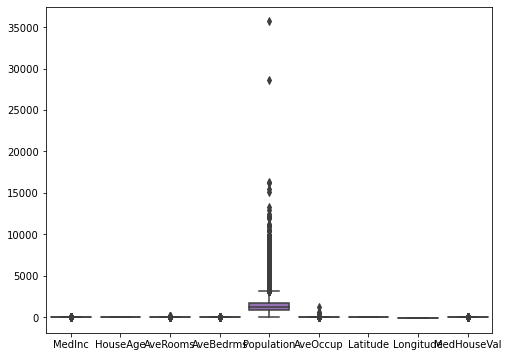

In [105]:
plt.figure(figsize = (8,6))
sns.boxplot(data=california_housing.frame)

As we can see there are some outliers present in population data

<AxesSubplot:xlabel='HouseAge', ylabel='MedHouseVal'>

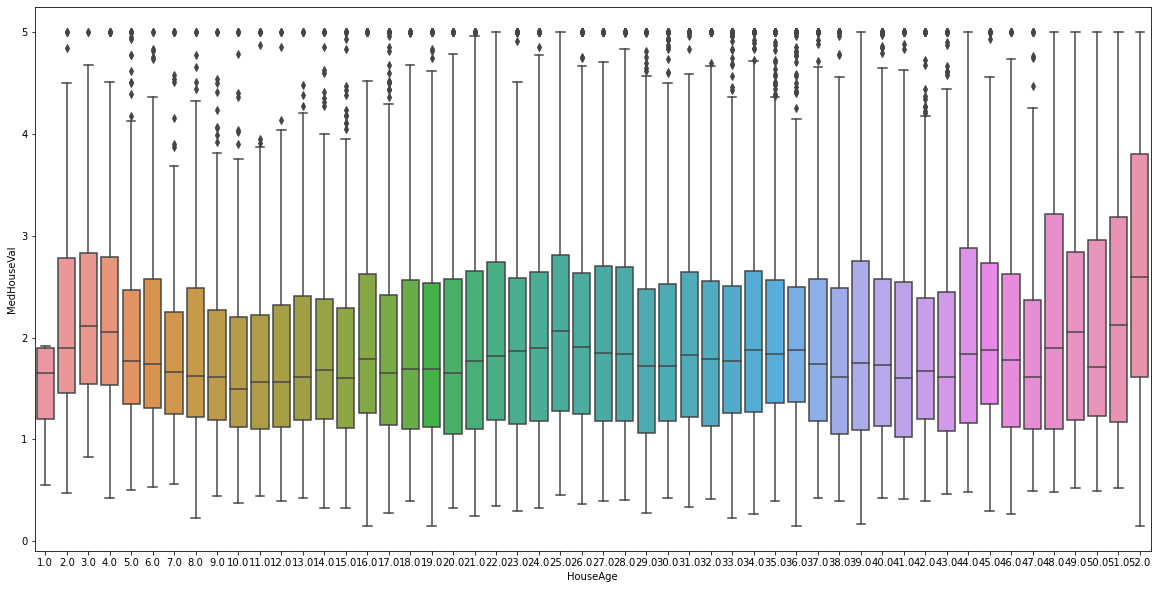

In [123]:
sns.boxplot(x='HouseAge',y='MedHouseVal',data= california_housing.frame)

# Check multicollinearity in numerical features

In [121]:
california_housing.frame.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


# Multivariate Analysis

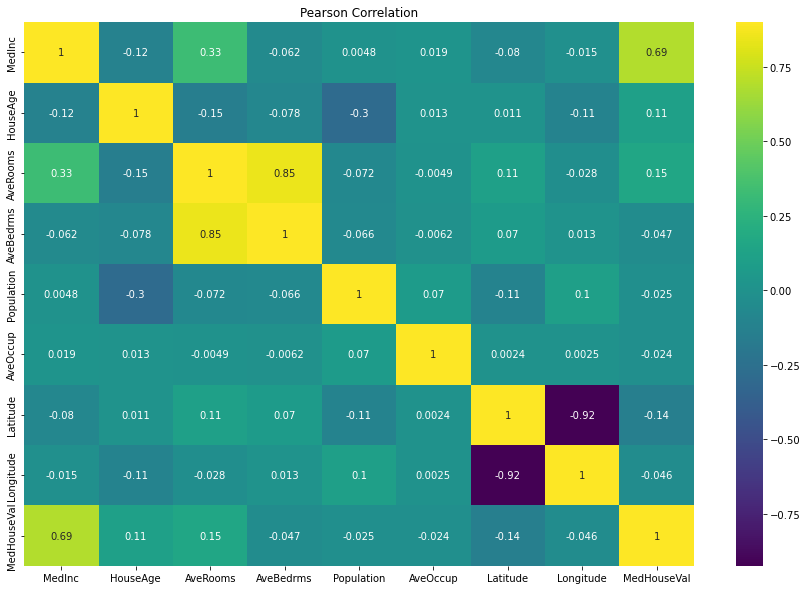

In [109]:
plt.figure(figsize = (15,10))
sns.heatmap(california_housing.frame.corr(), vmax = 0.9, cmap = 'viridis',  annot=True)
plt.title("Pearson Correlation")
plt.show()

Observation:
1.MedInc and MedHouseVal has highest correlation coefficients.
2,Longitude and Latitude has weak correlation coefficient.

# Plot top 5 MedHouseVal


In [130]:
income_index = california_housing.frame.MedHouseVal.value_counts().index
income_val=california_housing.frame.MedHouseVal.value_counts().index
plt.figure(figsize=(10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

([<matplotlib.patches.Wedge at 0x23d4ea00a30>,
 [Text(0.15654454276398824, 1.0888038418975265, '5.00001'),
  Text(-1.0936969889118844, -0.11758782439129369, '1.375'),
  Text(-0.6273529394994172, -0.9035642142656164, '1.625'),
  Text(0.19531013061795582, -1.0825220334376557, '1.125'),
  Text(0.9460160822588317, -0.5612963318138214, '1.875')],
 [Text(0.08538793241672085, 0.5938930046713781, '45.45%'),
  Text(-0.5965619939519369, -0.064138813304342, '12.50%'),
  Text(-0.34219251245422755, -0.4928532077812452, '14.77%'),
  Text(0.10653279851888499, -0.5904665636932668, '10.23%'),
  Text(0.5160087721411809, -0.3061616355348116, '17.05%')])

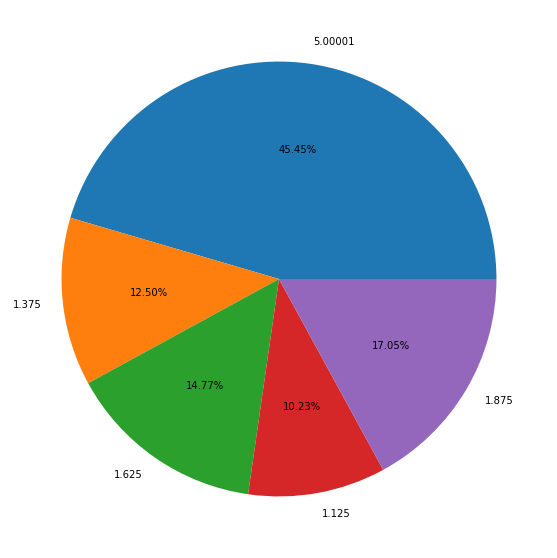

In [131]:
plt.pie(income_val[:5],labels=income_index[:5],autopct='%1.2f%%')


# Plot top 5 HouseAge

([<matplotlib.patches.Wedge at 0x23d4ea5b8e0>,
 [Text(0.5499999702695115, 0.9526279613277875, '52.0'),
  Text(-1.0433901091385263, 0.3483347242981874, '36.0'),
  Text(-0.4914782377139582, -0.9840981362920987, '35.0'),
  Text(0.5879124863004829, -0.9297090450522597, '16.0'),
  Text(1.0361641140562627, -0.36927486881996224, '17.0')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5691218777119234, 0.1900007587081022, '23.08%'),
  Text(-0.2680790387530681, -0.536780801613872, '22.44%'),
  Text(0.32067953798208154, -0.5071140245739598, '10.26%'),
  Text(0.5651804258488705, -0.2014226557199794, '10.90%')])

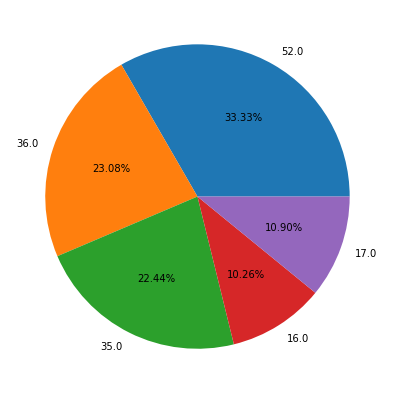

In [134]:
houseAge_index = california_housing.frame.HouseAge.value_counts().index
houseAge_val=california_housing.frame.HouseAge.value_counts().index
plt.figure(figsize=(10,7))
plt.pie(houseAge_val[:5],labels=houseAge_index[:5],autopct='%1.2f%%')

# Which household has highest and lowest AveBedrms?

In [136]:
## Highest AveBedrms
california_housing.frame.groupby(["AveRooms","AveBedrms"]).size().reset_index().tail(1)


,AveRooms,AveBedrms,0
20616,141.909091,25.636364,1


In [137]:
# Lowest AveBedrms
california_housing.frame.groupby(["AveRooms","AveBedrms"]).size().reset_index().head(1)


,AveRooms,AveBedrms,0
0,0.846154,0.846154,1


# Which MedInc has highest and lowest Population?


In [138]:
## Highest AveBedrms
california_housing.frame.groupby(["AveRooms","AveBedrms"]).size().reset_index().tail(1)

,Population,MedInc,0
20619,35682.0,2.5729,1


In [139]:
## lowest AveBedrms
california_housing.frame.groupby(["AveRooms","AveBedrms"]).size().reset_index().head(1)

,AveRooms,AveBedrms,0
0,0.846154,0.846154,1
